## MA124 Homework Assignment C
### Due in by 1200 on Monday 16th December 2024
#### Submission
Hand in is via the [MA124 Moodle page](https://moodle.warwick.ac.uk/mod/assign/view.php?id=2411195).

The hand-in link will be available from Monday 25th November.

You should submit **this Jupyter notebook only** with your responses added. **This must be a `.ipynb` file, not a pdf file or any other file type**. There are no additional marks based on overall quality and clarity of the submission.**

You may wish to comment your code but you will not lose marks for not doing so. Note that you will be expected to comment your code for the project next term so you may wish to have a go at this now.

The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose one mark if you submit a notebook that has not been run.**

**The usual submission rules and those rules stated at the end of this document apply. In particular, the noon deadline is strict. You should not wait until the very last moment to submit your work and you should make sure that you submit the correct work.**

**Note that, in line with university policy, you must declare the use of a generative Artificial Intelligence such as ChatGPT in your submission, including your reason for using it. If you do this please include any such declaration in markdown cells. You risk losing marks for using a generative Artificial Intelligence, depending on your reasons for doing so, and this will be judged on a case by case basis.**



---
### Task 1 - System of ODEs, solved using scipy (8 marks)
---

In this task you will use `odeint` function from the scipy library to numerically solve the following (autonomous) system of differential equations

$$
\begin{align}
\dot y_1 & = -y_2  \\
\dot y_2 & = y_1
\end{align}
$$

where $y_1,y_2$ are functions of $t$, for $0\leq t \leq \pi$, subject to $y_1(0) = 3, y_2(0) = 0$. You will also produce some graphical output using your solution.

**Specifically,** 
1. Follow the approach taken in the notebook `3_ODEs_SciPy.ipynb` to use `odeint` to produce the required numerical solution to the system of differential equations described above.
2. Move them into two 1D arrays y1 and y2, like in the example in `3_ODEs_SciPy.ipynb`.
2. Plot a suitably labelled phase portrait of your numerical solution with y1 represented on the horizontal axis and y2 represented on the vertical axis, and with markers at beginning, $t=0$, and end, $t=\pi$, of the path (see notebook `3_ODEs_SciPy.ipynb` for an example).

*Insert a code cell immediately below in which to provide your solution.*

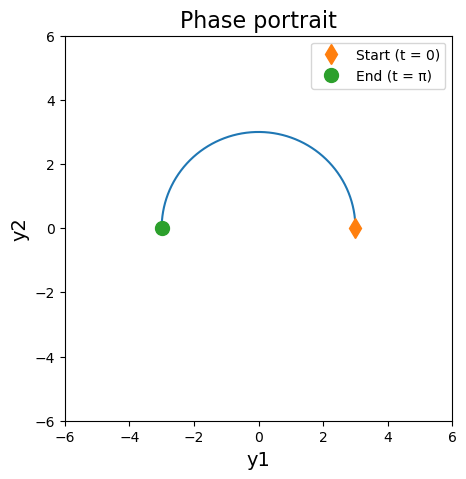

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def system(y,t):
    y1,y2 = y
    y1dot = -y2
    y2dot = y1
    return y1dot, y2dot

y0 = np.array([3, 0])
Nsteps = 1000
tf = np.pi
t = np.linspace(0, tf, Nsteps+1)

y_sol = odeint(system, y0, t)
y1 = y_sol[:,0]
y2 = y_sol[:,1]

plt.figure(figsize=(5,5))
plt.plot(y1, y2)
plt.plot(y1[0], y2[0],'d', label='Start (t = 0)', markersize = 10)
plt.plot(y1[-1], y2[-1],'o', label='End (t = π)', markersize = 10)
# by using the index of -1 you get the last value of y1,y2 for our array of t wshich will correspond to our t = π value

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel("y1", fontsize=14)
plt.ylabel("y2", fontsize=14)
plt.title("Phase portrait", fontsize=16)
plt.legend()
plt.show()

---
### Task 2 - Simple Linear Regression Machine Learning with sklearn (8 marks)

In the code cell below you will see that an array $X$ and an array $y$ are created. $X$ will be the design matrix and $y$ the target in a machine learning task. $X$ is a $100\times 2$ matrix and $y$ is a $1\times 100$ matrix.  Row $i$ of $X$ contains real numbers $x_{i,1},x_{i,2}$ and these have been used to create the value $y_i$ in the corresponding position of $y$ via the formula 

$$y_i = 3x_{i,1}+2x_{i,2}+4 + \mu$$ 

where $\mu$ is sampled, independently for each $i$, from a normal distribution with mean of $0$ and variance of $1$. 

If you run the code as it stands you will see a plot of the points $(x_{i,1},x_{i,2},y_i)$ in three dimensional space. Most are blue but the points corresponding to the last 5 rows of $X$ and the last five entries in $y$ are shown in red.

Your job is to add code so that a machine learning linear regression model is used, performing a test/train split on $X$ and $y$ to take the first 95 examples for the training data and the final 5 for the test data, to find a linear function modelling the data. 'Linear function' here means it will have form $f(x_1,x_2)=ax_1+bx_2+c = y$.

You should print out the prediction for the test data compared to their actual target values in `ytest` and plot the surface $y=f(x_1,y_2)$ where $f$ is the function returned by the model. (Something very close to this but with $y=f(x)$ was seen in the week 10 lecture.)

**Specifically, the code you add should**

- Include test train split for both the design matrix and the target, creating all four of `X_train`, `X_test`, `y_train`, `y_test` as in the examples in lectures and the workbook `1_Machine_learning_intro.ipynb`.
- Include `regr = linear_model.LinearRegression()` and train the model. The example in the workbook `1_Machine_Learning.ipynb should be useful for this`.
- Include code to find and print the values $a$, $b$, $c$ in the prediction function returned by the model in the form $f(x_1,x_2) = ax_1 + bx_2 + c$.
- Print out the predicted values for the reserved test data and their actual target values.
- Plots the surface (plane) $y = f(x_1,x_2)$ (i.e. $z = f(x,y)$ in the usual $x,y,z$ coordinates) on the same diagram as the existing plot in the code below. See the week 8 workbooks for a reminder about plotting surfaces in 3D.

Our linear equation is of the form y = ax1 + bx2 + c where a = 2.869892769096999 ,b = 1.9442329266447906 ,c =  4.382499488377171
These are the predicted values of the test data: [19.0129633   8.90683225  6.39291205 13.71063533 13.09222956]
These are the actual target values for the test data: [20.57053318  9.7642044   5.93564915 14.27527244 12.70232396]


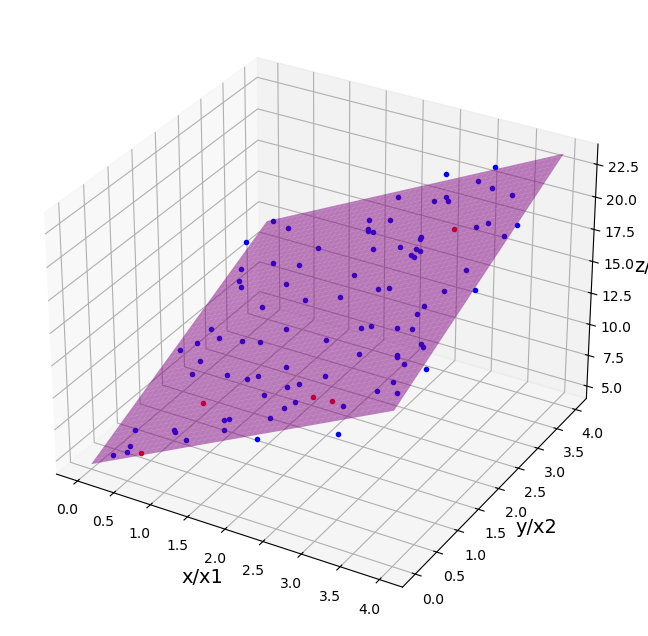

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

n = 100

x1 = np.random.uniform(0,4,n)
x2 = np.random.uniform(0,4,n)
y = 3*x1 + 2*x2 + 4 + np.random.normal(0,1,n)

X = np.array([x1,x2]).transpose() #creates the X matrix as an n by 2 matrix with each row a point (x1,x2)

X_train = X[:-5,:]
X_test = X[-5:,:]
y_train = y[:-5]
y_test = y[-5:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

a = regr.coef_[0]
b = regr.coef_[1]
c = regr.intercept_
print("Our linear equation is of the form y = ax1 + bx2 + c where a =",a,",b =",b,",c = ",c)

y_pred = regr.predict(X_test)
print("These are the predicted values of the test data:",y_pred)
print("These are the actual target values for the test data:",y_test)

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection='3d')

# You need to add a plot of the graph of the linear function,
# which will be a plane, to the plot below
ax.plot(x1[:-5],x2[:-5],y[:-5], "b.", lw = 3)
ax.plot(x1[-5:],x2[-5:],y[-5:], "r.", lw = 3)

x1_values = np.linspace(0, 4, 100)
x2_values = np.linspace(0, 4, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
y_mesh = a*x1_mesh + b*x2_mesh + c
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color = 'purple', alpha = 0.5)

ax.set_xlabel("x/x1", fontsize=14)
ax.set_ylabel("y/x2", fontsize=14)
ax.set_zlabel("z/y", fontsize=14)
plt.show()

---
### Task 3 Networks using NetworkX (4 marks)
---
Here you will display the graph of a network, provided to you in a separate file, and then make a comment about it.

**Specifically,**
- Go to the MA124 website and download the `out.zebra` file from the week 10 resources folder or zip folder, or from the Assignments section. Make sure that `out.zebra` is in the same folder as this notebook is in (be that an actual folder or a virtual folder).

- Insert a code cell below. In it, by adapting the code from the the notebook `2_Networks.ipynb`, create and diplay a graph of the zebra network.

- Make a brief comment about some feature of the graph in a markdown cell which you add below the displayed graph. **This must be in a markdown cell rather than being printed using code, otherwise you will lose a mark.**

*Insert code cell(s) below in which to complete this task.*

<class 'networkx.classes.graph.Graph'>
The number of nodes is 27
The number of edges is 111


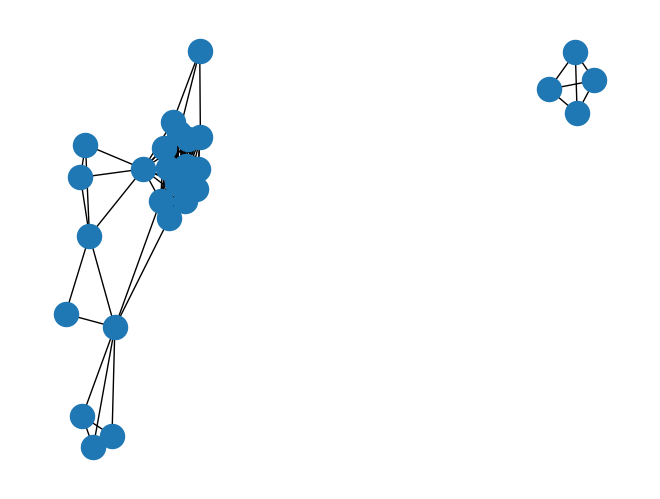

In [8]:
import networkx as nx

G = open("out.zebra", "rb")
zebra_graph = nx.read_edgelist(G, comments='%')
G.close()
print(type(zebra_graph))
print("The number of nodes is", zebra_graph.number_of_nodes()) 
print("The number of edges is", zebra_graph.number_of_edges()) 
positions = nx.spring_layout(zebra_graph)
nx.draw(zebra_graph, positions)

This is a markdown cell. This graph contains the complete graph K4 as a subgraph. The graph is not connected. The graph has 27 nodes and 111 edges. The graph is non-eulerian. The list can go on and there's a lot you can say about this graph.

---
In submitting this MA124 Maths by Computing assignment I declare that:
1. I have read the guidance on academic misconduct provided in the Student Handbook and understand the University regulations in relation to academic misconduct. I am aware of the potential consequences of committing academic misconduct. 
2. I declare that the work is all my own, except where I have stated otherwise.
3. No substantial part(s) of the work submitted here has also been submitted by me in other assessments for accredited courses of study (other than in the case of a resubmission of a piece of work), and I acknowledge that if this has been done an appropriate reduction in the mark I might otherwise have received will be made.
4. Where a generative Artificial Intelligence such as Chat GPT has been used I confirm I have abided by both the [University guidance](https://warwick.ac.uk/services/aro/dar/quality/az/acintegrity/framework/artificial-intelligence) and any specific requirements as set out in Student Handbook and assignment brief. I have clearly acknowledged the use of any generative Artificial Intelligence in my submission, my reason for using it and which generative AI (or AIs) I have used. Except where indicated the work is otherwise entirely my own.
5. I understand that should this piece of work raise concerns requiring investigation in relation to any of the points above, it is possible that other work I have submitted for assessment will be checked, even if the marking process has been completed.
6. The University expects any proofreader to comply with its policy in this area. By ticking 'yes', you confirm that any proofreader was made aware of and has complied with the [University's proofreading policy](http://www2.warwick.ac.uk/services/aro/dar/quality/categories/examinations/policies/v_proofreading).
7. I consent the my work may be submitted to Turnitin or other analytical technology. I understand the use of this service (or similar), along with other methods of maintaining the integrity of the academic process, will help the University uphold academic standard and assessment fairness.
